In [334]:
%matplotlib inline

In [335]:
import numpy as np
from matplotlib import pyplot as plt

In [336]:
A = np.matrix([[1,2],[3,4]])
B = A.transpose()
((A.transpose()*A).transpose(), A.transpose()*A)

(matrix([[10, 14],
         [14, 20]]), matrix([[10, 14],
         [14, 20]]))

In [337]:
sky = [0, 1, 0]

In [338]:
def normalize(v):
    l = np.linalg.norm(v)
    if l == 0:
        return None
    return v/l

In [360]:
def project(location, direction, sky, vec):
    left = normalize(np.cross(sky, direction))
    SRC = np.matrix([normalize(direction), normalize(sky), left]).transpose()
    a = np.arccos(np.dot(direction, sky)/np.linalg.norm(direction)/np.linalg.norm(sky))
    DST = np.matrix([[0, 0, 1], [0, np.sin(a), np.cos(a)], [1, 0, 0]]).transpose()
    T = DST * np.linalg.inv(SRC)
    print T.transpose() * T
    reoriented = T * (vec - np.expand_dims(location, 2))
    return reoriented / reoriented[2, :]

In [361]:
sky = [0, 1, 0]
direction = [10, 20, 30]
left = normalize(np.cross(sky, direction))
SRC = np.matrix([direction, sky, left]).transpose()
a = np.arccos(np.dot(direction, sky)/np.linalg.norm(direction)/np.linalg.norm(sky))
DST = np.matrix([[1, 0, 0], [np.cos(a), np.sin(a), 0], [0, 0, 1]]).transpose()

In [366]:
vectors = np.array([
            [+1, +1, +1],
            [+1, +1, -1],
            [+1, -1, +1],
            [+1, -1, -1],
            [-1, +1, +1],
            [-1, +1, -1],
            [-1, -1, +1],
            [-1, -1, -1],
        ])

In [413]:
edges = np.matrix([
 (0, 4),
 (1, 5),
 (2, 6),
 (3, 7),
 (0, 2),
 (1, 3),
 (4, 6),
 (5, 7),
 (0, 1),
 (2, 3),
 (4, 5),
 (6, 7)
])

In [393]:
projected = project([4, 3, 1], [-4, -3, -1], [0, 1, 0], vectors.transpose()).transpose()

[[  1.00000000e+00  -5.55111512e-17  -5.55111512e-17]
 [ -5.55111512e-17   1.00000000e+00   1.38777878e-17]
 [ -5.55111512e-17   1.38777878e-17   1.00000000e+00]]


In [394]:
projected

matrix([[ 0.20611565,  0.0269484 ,  1.        ],
        [-0.30917347,  0.09701425,  1.        ],
        [ 0.15458674, -0.32338083,  1.        ],
        [-0.23782575, -0.24253563,  1.        ],
        [ 0.23782575,  0.24253563,  1.        ],
        [-0.13250292,  0.27718357,  1.        ],
        [ 0.19323342, -0.06063391,  1.        ],
        [-0.10912005, -0.0142668 ,  1.        ]])

In [395]:
w

-0.030081937989002553

matrix([[0, 4],
        [1, 5],
        [2, 6],
        [3, 7],
        [0, 2],
        [1, 3],
        [4, 6],
        [5, 7],
        [0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])

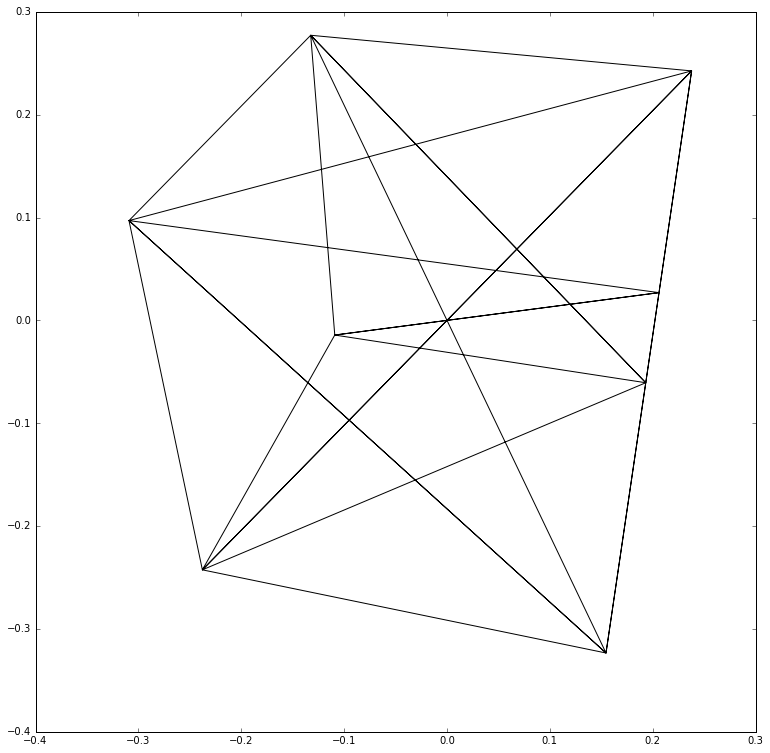

In [437]:
m = projected[:,[0,1]].min(axis=0).tolist()[0]
M = projected[:,[0,1]].max(axis=0).tolist()[0]
w = np.concatenate([np.expand_dims(m, 2), np.expand_dims(M, 2)], axis=1).min()
W = np.concatenate([np.expand_dims(m, 2), np.expand_dims(M, 2)], axis=1).max()
plt.figure(figsize=(10, 10))
plt.axes([0, 0, 1, 1])
plt.plot([w, w], [W, W])
e = edges.shape[0]
lines = np.zeros(shape=(e*3, 2)) * np.nan
lines[range(0, e*2, 2), :] = projected[edges[:,0], [0,1]]
lines[range(1, e*2 + 1, 2), :] = projected[edges[:,1], [0,1]]
plt.plot(lines[:, 0], lines[:, 1], 'k')
edges

In [424]:
(lines[range(0, e*2, 2), :].shape, edges.shape)

((12, 3), (12, 2))

In [409]:
np.arange?

In [174]:
np.cross([1, 0, 0], [np.cos(1), np.sin(1), 0])

array([ 0.        ,  0.        ,  0.84147098])

In [202]:
projected

matrix([[-116.67889919,   -0.18569534,    1.        ],
        [ -40.00023946,   -0.8046798 ,    1.        ],
        [-119.17026359,    3.52821143,    1.        ],
        [ -40.83069426,    0.43328912,    1.        ],
        [  39.44660293,    0.43328912,    1.        ],
        [ 121.66162799,    3.52821143,    1.        ],
        [  40.27705773,   -0.8046798 ,    1.        ],
        [ 124.15299238,   -0.18569534,    1.        ]])

In [398]:

import matplotlib.animation as animation

In [399]:
animation.FuncAnimation?